In [1]:
import numpy as np
import pandas as pd

from my_framework.modeles.SIRModel import SIRModel
from my_framework.modeles.SEIRModel import SEIRModel
from my_framework.modeles.SEIRDModel import SEIRDModel
from my_framework.etl import get_dataset
from my_framework.plot import plot_simple_sir, plot_triple_sir, plotseird

import warnings
warnings.filterwarnings(action='once')

# Modèle SIR

## Fit only on Infected

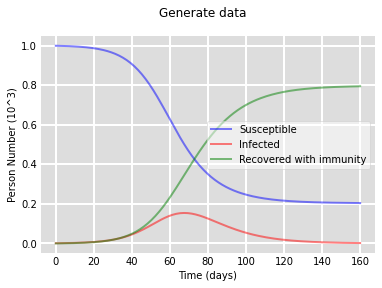

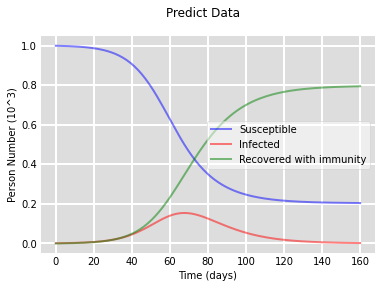

Beta : 0.2 , predict : 0.19999999999999893
Gamma : 0.1 , predict : 0.0999999999999996


In [2]:
# variable
t = np.linspace(0, 160, 160)
N = 1000
beta, gamma = 0.2, 0.1

# Generate data
sir_model = SIRModel(beta=beta, gamma=gamma)
S, I, R = sir_model.predict(t, N, 1)
plot_simple_sir(t, S, I, R, title="Generate data")

# Train other model
sir_model_predict = SIRModel()
sir_model_predict.fit(N, I)
S_pred, I_pred, R_pred = sir_model_predict.predict(t, N, 1)
plot_simple_sir(t, S_pred, I_pred, R_pred, title="Predict Data")

print("Beta :", sir_model.params["beta"], ", predict :", sir_model_predict.params["beta"])
print("Gamma :", sir_model.params["gamma"], ", predict :", sir_model_predict.params["gamma"])

## Fit on Infected and recovered

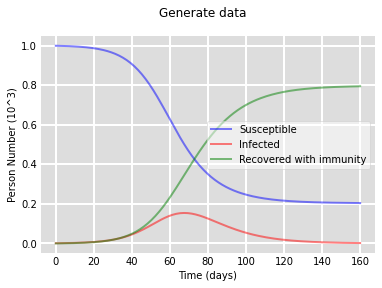

/usr/lib/python3/dist-packages/my_framework/modeles/SIRModel.py:63: RuntimeWarning:

overflow encountered in double_scalars



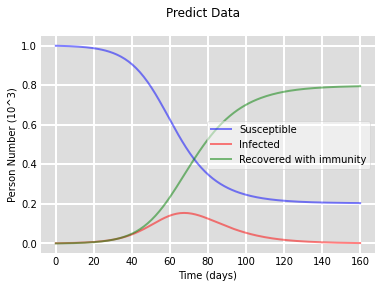

Beta : 0.2 , predict : 0.20023379383997608
Gamma : 0.1 , predict : 0.10007362102919058


In [3]:
# variable
t = np.linspace(0, 160, 160)
N = 1000
beta, gamma = 0.2, 0.1

# Generate data
sir_model = SIRModel(beta=beta, gamma=gamma)
S, I, R = sir_model.predict(t, N, 1)
plot_simple_sir(t, S, I, R, title="Generate data")

# Train other model
sir_model_predict = SIRModel()
sir_model_predict.fit(N, I, R)
S_pred, I_pred, R_pred = sir_model_predict.predict(t, N, 1)
plot_simple_sir(t, S_pred, I_pred, R_pred, title="Predict Data")

print("Beta :", sir_model.params["beta"], ", predict :", sir_model_predict.params["beta"])
print("Gamma :", sir_model.params["gamma"], ", predict :", sir_model_predict.params["gamma"])

# Modèle SEIR

# Fit on Infected

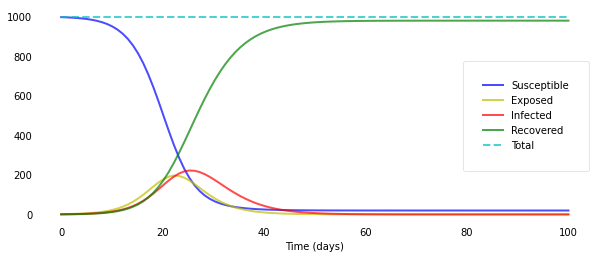

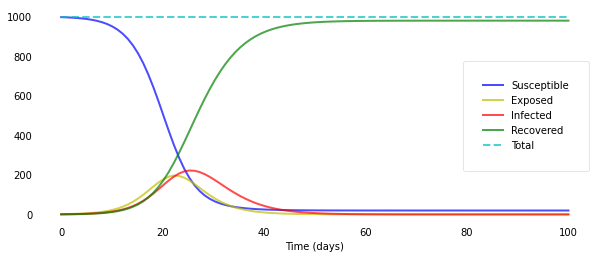

Beta : 1.0 , predict : 0.9999999999995977
Gamma : 0.25 , predict : 0.2499999999999894
Delta : 0.3333333333333333 , predict : 0.3333333333335639


In [4]:
# variable
t = np.linspace(0, 100, 100)
N = 1000
beta = 1.0  
D = 4.0 
gamma = 1.0 / D
delta = 1.0 / 3.0  

# Generate data
seir_model = SEIRModel(beta=beta, gamma=gamma, delta=delta)
S, E, I, R = seir_model.predict(t, N, 1)
plotseird(t, S, E, I, R )

# Train other model
seir_model_predict = SEIRModel()
seir_model_predict.fit(N, I)
S_predict, E_predict, I_predict, R_predict = seir_model_predict.predict(t, N, 1)
plotseird(t, S_predict, E_predict, I_predict, R_predict)

print("Beta :", seir_model.params["beta"], ", predict :", seir_model_predict.params["beta"])
print("Gamma :", seir_model.params["gamma"], ", predict :", seir_model_predict.params["gamma"])
print("Delta :", seir_model.params["delta"], ", predict :", seir_model_predict.params["delta"])

## Fit on Infected and recovered

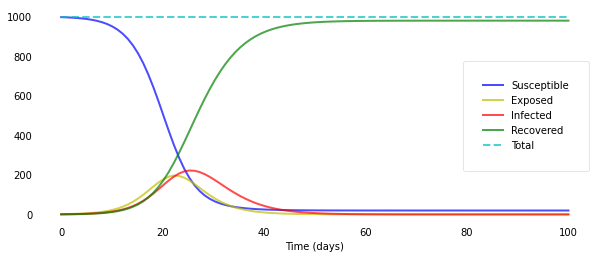

/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/usr/lib/python3/dist-packages/my_framework/modeles/SEIRModel.py:68: RuntimeWarning:

overflow encountered in double_scalars



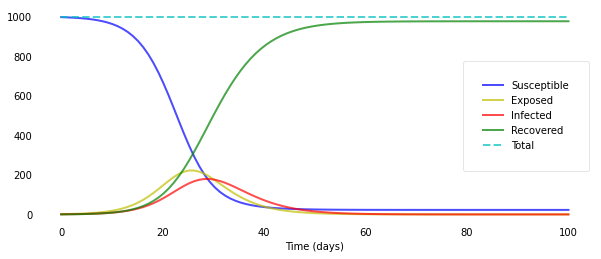

Beta : 1.0 , predict : 1.058143166614953
Gamma : 0.25 , predict : 0.27377445119074273
Delta : 0.3333333333333333 , predict : 0.2479100923524463


In [5]:
# variable
t = np.linspace(0, 100, 100)
N = 1000
beta = 1.0  
D = 4.0 
gamma = 1.0 / D
delta = 1.0 / 3.0  

# Generate data
seir_model = SEIRModel(beta=beta, gamma=gamma, delta=delta)
S, E, I, R = seir_model.predict(t, N, 1)
plotseird(t, S, E, I, R )

# Train other model
seir_model_predict = SEIRModel()
seir_model_predict.fit(N, I, R)
S_predict, E_predict, I_predict, R_predict = seir_model_predict.predict(t, N, 1)
plotseird(t, S_predict, E_predict, I_predict, R_predict)

print("Beta :", seir_model.params["beta"], ", predict :", seir_model_predict.params["beta"])
print("Gamma :", seir_model.params["gamma"], ", predict :", seir_model_predict.params["gamma"])
print("Delta :", seir_model.params["delta"], ", predict :", seir_model_predict.params["delta"])

# SEIRD

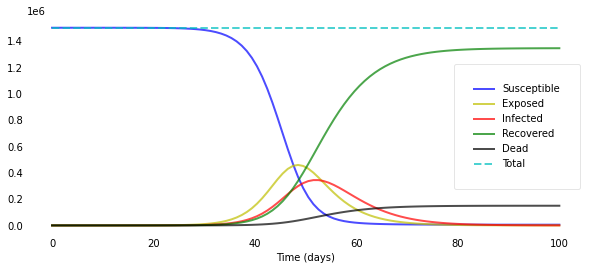

/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



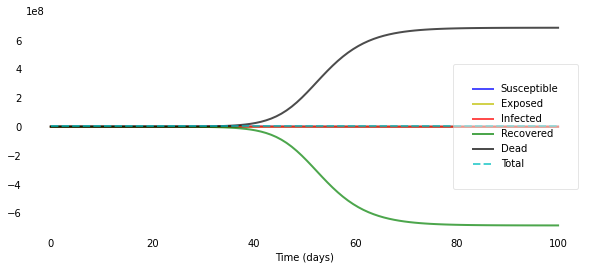

Beta : 1.25 , predict : 0.7675294645787472
Gamma : 0.25 , predict : 1.0031941010818972
Delta : 0.2 , predict : 0.5141195028469964
alpha : 0.2 , predict : 106.19778569781725
rho : 0.1111111111111111 , predict : 0.9958407024724347


In [7]:
# variable
t = np.linspace(0, 100, 100)
N = 1_500_000
D = 4
gamma = 1 / D
R_0 = 5
all_params = {"gamma": gamma, "delta": 1 / 5, "beta": R_0 * gamma, "alpha": 0.2, "rho": 1/9}

# Generate Data
seird_model = SEIRDModel(**all_params)
S, E, I, R, D = seird_model.predict(t, N, 1)
plotseird(t, S, E, I, R, D )

# Train other model
seird_model_predict = SEIRDModel()
seird_model_predict.fit(I, N)

S_pred, E_pred, I_pred, R_pred, D_pred = seird_model_predict.predict(t, N, 1)
plotseird(t, S_pred, E_pred, I_pred, R_pred, D_pred)

print("Beta :", seird_model.params["beta"], ", predict :", seird_model_predict.params["beta"])
print("Gamma :", seird_model.params["gamma"], ", predict :", seird_model_predict.params["gamma"])
print("Delta :", seird_model.params["delta"], ", predict :", seird_model_predict.params["delta"])
print("alpha :", seird_model.params["alpha"], ", predict :", seird_model_predict.params["alpha"])
print("rho :", seird_model.params["rho"], ", predict :", seird_model_predict.params["rho"])

